# Sommaire <a name=0 ></a>
- [Introduction](#1)
- [I. Analyse Exploratoire des Datasets & 1er Feature Engineering](#2)
    - [1. Importation & Découverte des Données](#3)
    - [2. Nettoyage des Données](#4)
    - [3. Feature engineering](#5)
    - [4. Identification & traitement des Valeurs Aberrantes](#6)
- [II. Développement & Simulation d'un Premier Modèle](#7)

# Introduction<a name=1 ></a>

Le rapport qui suit a été élaboré dans le cadre de l'objectif de neutralité en émissions de carbone à l'horizon 2050 de la ville de Seattle. Dans cette démarche, nos équipes se sont intéressées de près à la consommation et aux émissions des bâtiments non destinés à l'habitation.

Des relevés minutieux ont ainsi été effectués par les agents de la ville en 2016 et regroupées dans une base de données appellée "Building_Energy_Benchmarking", qui nous servira ici d'outil de travail. Cependant, ces relevés sont coûteux à obtenir. C'est pourquoi, l'objet de cette étude consiste à effectuer des prédictions aussi proches que possible de la réalité sur les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l'habitation pour lesquels elles n’ont pas encore été mesurées. Ces prédictions s'opèrereront donc à partir des relevés déjà réalisés en 2016, et se baseront sur les données structurelles des bâtiments (taille et usage des bâtiments, date de construction, situation géographique, ...)

L'objectif de ce projet étant de pouvoir prédire 2 valeurs, la suite de notre étude sera dès lors divisé en 2 supports de présentation, chacun d'entre eux étant consacré une variable cible spécifique. Cependant, il nous faut, au préalable, disposer d'un dataset nettoyé, optimisé et sur lequel nous serons à même d'effectuer des modèles prédictifs pertinents et performants.

C'est pourquoi le support de présentation ci-présent est ici dédié à la première étape de notre mission, à savoir la mise en place d'une analyse exploratoire des données disponibles dans "Building_Energy_Benchmarking" ainsi qu'un premier feature engineering.

Enfin, après avoir testé différents modèles de prédiction afin de répondre au mieux à la problématique pour chacune des 2 valeurs à prédire, nous chercherons également à évaluer l’intérêt de l'"ENERGY STAR Score" pour la prédiction d'émissions, qui est fastidieux à calculer avec l'approche utilisée actuellement par nos équipes. Nous l'integrerons donc dans la modélisation et jugerons de son intérêt.

# I. Analyse Exploratoire des Datasets & 1er Feature Engineering<a name=2 ></a>

## 1. Importation & Découverte des Données<a name=3 ></a>

Nous allons donc débuter par l'importation du dataset "Building_Energy_Benchmarking" dont nous nous servirons du contenu pour l'ensemble de notre étude. Une fois importé, nous allons faire notre première analyse à chaud du contenu de ce dataset :

In [1]:
import pandas as pd

Building_Energy_Benchmarking = pd.read_csv('2016_Building_Energy_Benchmarking.csv',dtype={'OSEBuildingID': str,'ZipCode':str})
Building_Energy_Benchmarking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   object 
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   object 
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [2]:
Building_Energy_Benchmarking

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


Nous pouvons d'ores et déjà observer que notre base de données recense un ensemble de 3376 bâtiments autour de 46 caractéristiques. Il ne fait aucun doute que ce dataset constitue le résultat d'un travail extrêmement minutieux. Pour autant, les 46 caractéristiques ne sont pas indiquées de manière systématique, certaines d'entre elles n'étant pas remplies à 100%. Cela démontre avant la necessité de procéder à une sélection de variables pertinentes ainsi qu'à un nettoyage des données pour pouvoir répondre à nos objectifs de prédiction.

## 2. Nettoyage des Données<a name=4 ></a>

La première démarche demeure avant tout de pouvoir détecter une variable pouvant servir de clé primaire et de la préparer au mieux à cette fonction. Une fois fait, nous serons en mesure de nous en servir d'index pour la suite de nos étapes. Nous allons donc mesurer le nombre de valeurs uniques de chacune de nos 46 variables et sélectionner celle qui présente le chiffre le plus proche de celui du nombre d'individus rencensés, soit 3376 : 

In [3]:
Building_Energy_Benchmarking.nunique().sort_values(ascending=False)

OSEBuildingID                      3376
PropertyName                       3362
SiteEnergyUse(kBtu)                3354
Address                            3354
Electricity(kWh)                   3352
Electricity(kBtu)                  3351
SiteEnergyUseWN(kBtu)              3341
TaxParcelIdentificationNumber      3268
PropertyGFATotal                   3195
PropertyGFABuilding(s)             3193
LargestPropertyUseTypeGFA          3122
Latitude                           2876
TotalGHGEmissions                  2818
Longitude                          2656
NaturalGas(therms)                 2109
NaturalGas(kBtu)                   2109
SourceEUIWN(kBtu/sf)               1694
SourceEUI(kBtu/sf)                 1648
SecondLargestPropertyUseTypeGFA    1352
SiteEUIWN(kBtu/sf)                 1105
SiteEUI(kBtu/sf)                   1085
GHGEmissionsIntensity               511
ThirdLargestPropertyUseTypeGFA      501
PropertyGFAParking                  496
ListOfAllPropertyUseTypes           466


Avec un nombre de valeurs uniques de 3376, nous voyons ici que la colonne "OSEBuildingID" remplit parfaitement tous les critères pour en faire notre clé primaire et donc notre index, et qu'il n'est même pas nécessaire d'opérer un nettoyage au préalable.

Une fois notre clé primaire établie, nous sommes en mesure d'effectuer l'étape suivante de notre exploration. Cette dernière consiste à conserver uniquement les bâtiments non destinés à l'habitation. Pour rappel, il nous a bien été précisé dès le départ que le travail de prédiction qui nous est demandé ne doit s'appliquer que sur ces derniers.

Dans cette démarche, nous avons pu observer précédemment dans notre tableau que la variable "BuildingType" peut nous aider à faire le tri. Nous allons donc consulter les différentes valeurs que l'on peut observer dans cette variable et effectuer notre première opération de filtrage en fonction : 

In [4]:
Building_Energy_Benchmarking = Building_Energy_Benchmarking.set_index('OSEBuildingID')
Building_Energy_Benchmarking['BuildingType'].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

La valeurs observées dans la colonne "BuildingType" nous permettent bien d'effectuer notre filtrage. Les bâtiments type "Campus" correspondent à ceux dédiées aux études supérieurs et ceuxde type "SPS-District K-12" correspondent aux bâtiments dédiées à l'enseignement primaire et secondaire. Quant à ceux de type "NonResidential", "Nonresidential COS" et "Nonresidential WA", on ne peut pas être plus explicite!

Comme mentionné précédemment, les données ne sont pas forcément précises à 100%, mais les concepteurs de ce datasets, conscients de cette inexactitude, ont été suffisamment minutieux pour prévenir de cela grâce à des variables telles que "ComplianceStatus", "DefaultData" et "OUtlier". La prise en compte et le traitement de nos dataset en fonction de ces 3 variables va nous permettre de faciliter encore davantage notre opération de nettoyage. Interessons-nous tout d'abord à "ComplianceStatus" en observant les valeurs unique qui y sont répertoriées : 

In [5]:
non_residential = ['NonResidential','SPS-District K-12','Nonresidential COS','Campus','Nonresidential WA']
Building_Energy_Benchmarking = Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['BuildingType']\
                                                                .isin(non_residential)]

print("Building_Energy_Benchmarking :",Building_Energy_Benchmarking.shape[0],"\n\n",Building_Energy_Benchmarking['ComplianceStatus'].value_counts())

Building_Energy_Benchmarking : 1668 

 ComplianceStatus
Compliant                       1548
Error - Correct Default Data      88
Non-Compliant                     18
Missing Data                      14
Name: count, dtype: int64


D'après la liste ci-dessus, une écrasante majorité des bâtiments listés contiennent de valeurs considérées comme conformes. Lorsque ce n'est pas le cas, il nous est précisé si les informations sont incomplètes, ou si elles ont été remplies par des données par défaut, voire si elles sont considérées comme non-conformes. Dans ces 3 cas, nous pouvons en déduire que les bâtiments présentant ces valeurs dans la colonnes "ComplianceStatus" sont inexploitables, et pouvons les retirer de notre dataset.

Une fois ce filtrage exécuté, regardons de plus près les valeurs de la variable "DefaultData" : 

In [6]:
Building_Energy_Benchmarking.drop(Building_Energy_Benchmarking[Building_Energy_Benchmarking['ComplianceStatus']!='Compliant']\
                                  .index, inplace=True)

Building_Energy_Benchmarking['DefaultData'].value_counts()

DefaultData
False    1548
Name: count, dtype: int64

D'après cette colonne, aucun des bâtiments restants ne contient de valeurs par défaut. Nous pouvons donc passer à notre dernière étape de filtrage et ce dernier va se faire par approche métier. En effet, tout d'abord, nous allons nous intéresser à la variable "Neighborhood", qui présente un nombre de valeurs uniques limité mais qui constitue une caractéristique d'ordre géographique, ce qui peut avoir un impact sur nos valeurs cibles. Voilà il serait intéressant de le traiter  : 

In [7]:
Building_Energy_Benchmarking['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  351
GREATER DUWAMISH          328
MAGNOLIA / QUEEN ANNE     144
LAKE UNION                143
NORTHEAST                 117
EAST                      116
NORTHWEST                  74
BALLARD                    58
NORTH                      51
CENTRAL                    42
DELRIDGE                   36
SOUTHWEST                  31
SOUTHEAST                  31
North                       8
Ballard                     5
Delridge                    4
Northwest                   4
Central                     4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

Ici, la nécessité de modifier certaines valeurs pour donner un dataset plus conforme est clairement démontrée. Une fois ces modifications faites, nous allons nous intéresser aux 3 variables suivantes, qui constituent des variables de surface utilisée dont les valeurs sont tout aussi significatives pour nos futurs modèles de prédiction, ainsi qu'à leurs liens par approche métier : 
- PropertyGFATotal
- PropertyGFAParking
- PropertyGFABuilding(s)

Selon la logique métier, nous devrions avoir pour lien mathématique le fait que "PropertyGFATotal" = "PropertyGFAParking" + "PropertyGFABuilding(s)". Nous allons vérifier qu'aucun des individus de notre dataset ne déroge à cette règle : 

In [8]:
Building_Energy_Benchmarking['Neighborhood'].replace({'North': 'NORTH', 'Ballard': 'BALLARD','Central':'CENTRAL',\
                                                      'Northwest':'NORTHWEST','Delridge':'DELRIDGE',\
                                                      'DELRIDGE NEIGHBORHOODS':'DELRIDGE'}, inplace=True)

Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['PropertyGFATotal']!=\
                                 Building_Energy_Benchmarking['PropertyGFAParking']\
                                 +Building_Energy_Benchmarking['PropertyGFABuilding(s)']]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,


L'absence totale de lignes dans notre opération de filtrage confirme l'absence de valeurs aberrantes par approche métier en termes de surface. Nous pouvons donc maintenant passer à la deuxième étape de notre nettoyage, à savoir la mise en place de notre premier feature engineering. 

## 3. Feature engineering<a name=5 ></a>

Le feature engineering est le processus de transformation des données brutes en caractéristiques (features) qui peuvent être utilisées pour améliorer les performances des modèles de machine learning. Cela inclut la création, la modification ou la sélection de variables pertinentes pour l'apprentissage. L'une des principales précautions à prendre lors du feature engineering est d'éviter le data leakage, qui se produit lorsque des informations du jeu de test sont involontairement utilisées pour créer des caractéristiques dans le jeu d'entraînement. Cela peut fausser les résultats des modèles en donnant une vision trop optimiste de leurs performances, car le modèle aurait accès à des informations qu'il n'aurait pas en situation réelle.

Dans notre cas de figure, nous pouvons, par exemple, considérer que la consommation totale d'électricité, de gas ou de vapeur peuvent typiquement présenter un risque de data leakage lorsqu'ils sont pris en compte en termes de chiffre brut, ici mesuré en kBtu. Voilà pourquoi nous allons transformer ces données brutes en ratio par rapport à la quantité totale d'énergie consommée par chaque bâtiment. Nous aurons ainsi connaissance du pourcentage de chaque source d'énergie sur la consommation totale.

Nous allons également créer une colonne nommé "Total" qui constituera la somme totale des ratios crées précédemment. Les valeurs de cette nouvelle colonne, qui ne devraient pas, théoriquement, dépasser 100, permettront par la suite un traitement des valeurs aberrantes.

Enfin, toujours dans notre démarche de création de notre feature engineering, nous allons créer une autre colonne dans lequel l'âge de chaque bâtiment sera calculé en nous servant des valeurs des colonnes "DataYear" et "YearBuilt". Il s'agit ni plus ni moins de la soustraction de l'année où notre dataset a été élaboré avec celle où le bâtiment fut construit.

Une fois la création de ces nouveaux features accomplis, nous pouvons procéder à un filtrage à la verticale par la sélection finale des features que nous considerons comme indispensable à notre projet de modèles prédictifs.

En premier lieu, il nous avait bien été spécifié que l'objectif de notre projet était de pouvoir prédire les consommations de CO2 et les consommations totales d’énergie. Pour les premiers, nous allons donc désigner pour variable cible celle qui indique la totalité des gaz à effet de serre émis dans l'année, soit "TotalGHGEmissions". Pour les deuxièmes valeurs, nous allons nous servir de la variable "SiteEnergyUseWN(kBtu)" qui représente la quantité totale d'énergie consommée dans l'année en kBtu, régulée selon les standards météorologiques.

Enfin, nous allons selectionner les features considérés comme indispensables, dans le sens où ils remplissent des critères qui peuvent être listés comme suit : 
- Activité : nous conservons ici le libéllé de nos bâtiments ainsi que leurs fonctions principales respectives. En effet, selon l'activité à laquelle est dédiée chaque bâtiment, la consommation totale d'énergie ainsi que sa quantité de GHG émis peut potientiellement varier de manière significative. ('PrimaryPropertyType','PropertyName')
- Géographie : Comme dit précédemment, les valeurs de nos variables cibles peuvent également différer selon la position géographique des bâtiments. (Neighborhood','Latitude','Longitude')
- Structure : nous jugeons que la taille d'un bâtiment, sa surface ainsi que le nombre d'étage qu'elle abrite permettra logiquement d'effectuer nos modèles de prédiction. ('NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'Age', 'PropertyGFABuilding(s)')'Electricity(%)','NaturalGas(%)','SteamUse(%)','Total')
- Source d'énergie : A consommation égale, la quantité d'émission de GHG ne sera pas identique si l'énergie provient de l'électricité, du gas ou de la vapeur. Voilà pourquoi la prise en compte des parts de ces sources dans la consommation totale permettra la création de modèles plus performants. ('Electricity(%)', 'NaturalGas(%)', 'SteamUse(%)', 'Total')

In [9]:
Building_Energy_Benchmarking["Electricity(%)"] = Building_Energy_Benchmarking['Electricity(kBtu)']\
/Building_Energy_Benchmarking['SiteEnergyUse(kBtu)']
Building_Energy_Benchmarking["Electricity(%)"] = round(Building_Energy_Benchmarking["Electricity(%)"]*100,2)

Building_Energy_Benchmarking["NaturalGas(%)"] = Building_Energy_Benchmarking['NaturalGas(kBtu)']\
/Building_Energy_Benchmarking['SiteEnergyUse(kBtu)']
Building_Energy_Benchmarking["NaturalGas(%)"] = round(Building_Energy_Benchmarking["NaturalGas(%)"]*100,2)

Building_Energy_Benchmarking["SteamUse(%)"] = Building_Energy_Benchmarking['SteamUse(kBtu)']\
/Building_Energy_Benchmarking['SiteEnergyUse(kBtu)']
Building_Energy_Benchmarking["SteamUse(%)"] = round(Building_Energy_Benchmarking["SteamUse(%)"]*100,2)

Building_Energy_Benchmarking["Total"] = Building_Energy_Benchmarking['SteamUse(%)']\
+Building_Energy_Benchmarking['NaturalGas(%)']+Building_Energy_Benchmarking['Electricity(%)']

Building_Energy_Benchmarking['Age']=Building_Energy_Benchmarking['DataYear']-Building_Energy_Benchmarking['YearBuilt']

Building_Energy_Benchmarking = Building_Energy_Benchmarking[['PrimaryPropertyType','PropertyName','Neighborhood','Latitude',
                                                             'Longitude','NumberofBuildings','NumberofFloors',
                                                             'PropertyGFAParking','Age','PropertyGFABuilding(s)','Outlier',
                                                             'Electricity(%)','NaturalGas(%)','SteamUse(%)','Total',
                                                             'TotalGHGEmissions','SiteEnergyUseWN(kBtu)','ENERGYSTARScore']]
Building_Energy_Benchmarking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1548 entries, 1 to 50226
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PrimaryPropertyType     1548 non-null   object 
 1   PropertyName            1548 non-null   object 
 2   Neighborhood            1548 non-null   object 
 3   Latitude                1548 non-null   float64
 4   Longitude               1548 non-null   float64
 5   NumberofBuildings       1548 non-null   float64
 6   NumberofFloors          1548 non-null   int64  
 7   PropertyGFAParking      1548 non-null   int64  
 8   Age                     1548 non-null   int64  
 9   PropertyGFABuilding(s)  1548 non-null   int64  
 10  Outlier                 0 non-null      object 
 11  Electricity(%)          1548 non-null   float64
 12  NaturalGas(%)           1548 non-null   float64
 13  SteamUse(%)             1548 non-null   float64
 14  Total                   1548 non-null   floa

Maintenant que nous avons effectué notre première vague de filtrage de manière horizontale et verticale, nous pouvons analyser plus en détails le contenu de nos features et les traiter en conséquence. En effet, il est temps désormais de se pencher sur l'étapê suivante de notre analyse exploratoire, à savoir la détection et le traitement des valeurs considérées comme aberrantes.

## 4. Identification & traitement des Valeurs Aberrantes<a name=6 ></a>

D'après notre liste ci-dessus, nous pouvons d'ores et déjà éliminer la variable "Outlier" de notre équation. Deuxièmement, dans le contexte de la création de modèles prédictifs, il est impératif de conserver uniquement les bâtiments dont les variables cibles sont identifiées. Voilà pourquoi nous devons supprimer également de l'équation le bâtiment contenant une valeur nulle dans la colonne "SiteEnergyUseWN(kBtu)".

Ces opérations faites, nous allons visualiser le contenu de notre base de données dans son ensemble grâce à l'outil "describe" de Pandas : 

In [10]:
Building_Energy_Benchmarking.drop(columns=['Outlier'], inplace=True)

Building_Energy_Benchmarking.drop(Building_Energy_Benchmarking[Building_Energy_Benchmarking['SiteEnergyUseWN(kBtu)'].isna()]\
                                  .index,inplace=True)

Building_Energy_Benchmarking.describe()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1.547000e+03,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1.547000e+03,996.000000
mean,47.616492,-122.333511,1.179056,4.274725,13794.943762,54.367162,1.075308e+05,69.964564,27.390957,2.252534,99.608054,193.663497,8.441981e+06,63.606426
std,0.046969,0.023270,3.040201,6.782532,43696.166334,32.894589,2.927174e+05,26.475268,26.411568,9.407709,5.472470,779.354251,2.277676e+07,28.824747
min,47.509590,-122.411820,0.000000,0.000000,0.000000,1.000000,3.636000e+03,-33.680000,0.000000,0.000000,-33.680000,-0.800000,0.000000e+00,1.000000
25%,47.587840,-122.342940,1.000000,1.000000,0.000000,27.000000,2.793550e+04,48.995000,0.000000,0.000000,100.000000,20.650000,1.322090e+06,44.000000
50%,47.612750,-122.333160,1.000000,2.000000,0.000000,51.000000,4.610000e+04,70.520000,23.190000,0.000000,100.000000,49.790000,2.824097e+06,71.000000
75%,47.649070,-122.322680,1.000000,4.000000,0.000000,86.000000,9.571050e+04,100.000000,48.935000,0.000000,100.000000,147.315000,7.470130e+06,88.000000
max,47.733870,-122.261800,111.000000,99.000000,512608.000000,116.000000,9.320156e+06,100.000000,100.000000,76.700000,123.730000,16870.980000,4.716139e+08,100.000000


Sans avoir encore à recourir à tout outil statistique pour traiter les valeurs abérrantes, nous pouvons au préalable en observer un certain nombre grâce au tableau ci-dessus : 
- Premièrement, il existe dans notre dataset des individus dont le nombre de bâtiments est indiqué à 0, ce qui est en toute logique impossible. Nous allons remplacer ces valeurs par 1.
- Deuxièmement, nous pouvons observer des individus dont le taux d'émission de gaz à effet de serre est négatif, cas de figure là aussi impossible en toute logique. Nous allons donc retirer de notre dataset tout bâtiment ayant une valeur supérieure ou égale à 0 dans la colonne "TotalGHGEmissions".
- Troisièmement, nous pouvons également observer au moins 1 individu dont la consommation totale d'énergie est nulle. Nous allons donc appliquer ici la même opération que précédemment.
- Enfin, Nous observons des individus dont le pourcentage d'électricité dans la consommation totale d'énergie est négative. Et parce que d'un point de vue métier, nous savons qu'il est impossible pour un bâtiment de fonctionner à 0% à l'électricité, nous allons donc appliquer là aussi la même opération.

La partie qui va suivre consistera dès lors à effectuer une détection et un traitement des valeurs aberrantes tant en effectuant en parallèle une courte analyse exploratoire par la création et la visualisation de graphiques en fonction des features. Par exemple, nous allons visualiser la répartition de nos 2 valeurs cibles en fonction de l'activité principale des bâtiments :

<Figure size 1500x750 with 0 Axes>

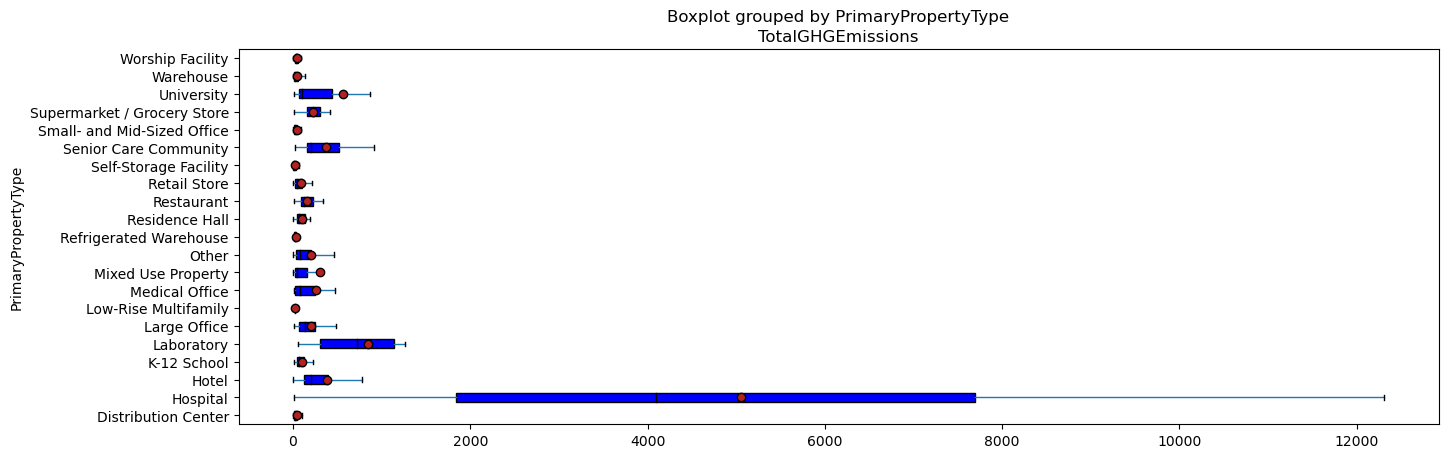

<Figure size 1500x750 with 0 Axes>

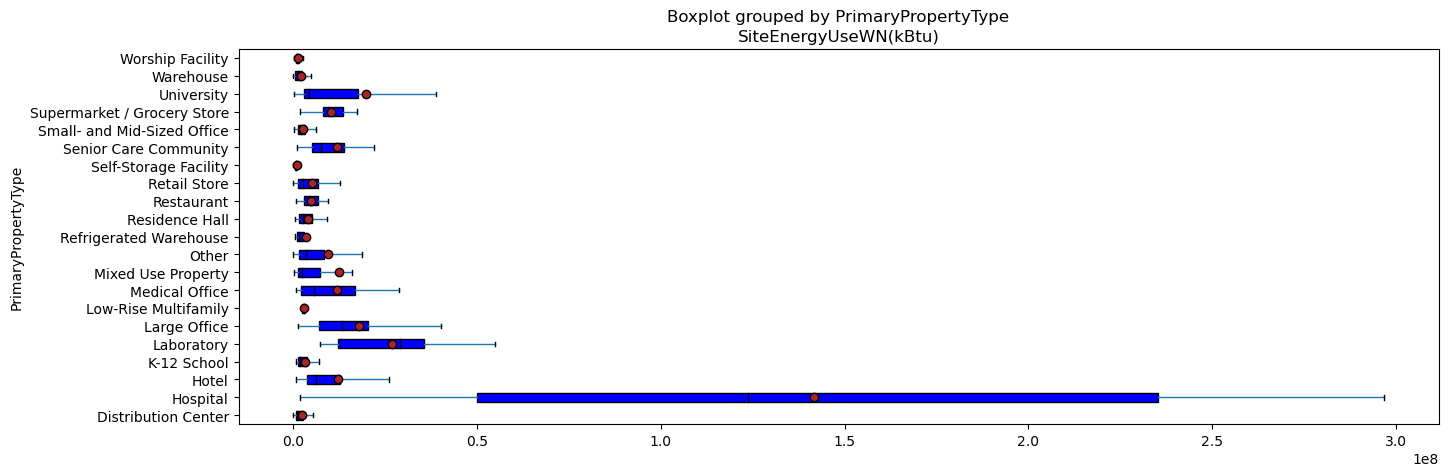

In [11]:
Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['NumberofBuildings'] == 0,'NumberofBuildings'] = 1

Building_Energy_Benchmarking.drop(Building_Energy_Benchmarking[Building_Energy_Benchmarking['TotalGHGEmissions'] <= 0].index,
                                  inplace=True)
Building_Energy_Benchmarking.drop(Building_Energy_Benchmarking[Building_Energy_Benchmarking['SiteEnergyUseWN(kBtu)'] <= 0]\
                                  .index,inplace=True)
Building_Energy_Benchmarking.drop(Building_Energy_Benchmarking[Building_Energy_Benchmarking['Electricity(%)'] <= 0]\
                                  .index,inplace=True)

import matplotlib.pyplot as plt

target = ['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

for i in target:
    plt.figure(figsize=(15, 7.5))
    Building_Energy_Benchmarking.boxplot(column=i, by='PrimaryPropertyType', figsize=[15,5], medianprops=medianprops, showmeans=True, 
                      meanprops=meanprops, vert=False, showfliers=False, patch_artist=True, 
                      boxprops=dict(facecolor="blue", color="black"))
    plt.grid()
    plt.show()

Il est bon de noter qu'à ce stage de l'analyse, hormis "PropertyName" que nous ne garderons pas pour la suite, la colonne "PrimaryPropertyType" constitue l'unique variable qualitative que nous avons conservé. Or, les variables boxplot affichés ci-dessus démontrent l'importance que ce feature occupe pour les futurs modèles. La prise en compte de cette variable qualitative dans la modélisation nous permettra de prédire, à titre d'exemple, des valeurs particulièrement élevées si le ou les bâtiments sont répertoriés comme étant des hôpitaux. De plus, les moyennes étant de manière générale assez proches des médianes, nous pouvons qu'il n'existe pas ou peu de valeurs abérrantes liées à la feature "PrimaryPropertyType".

En revanche, nous avons pu repérer l'existence d'un ou plusieurs individus ayant pour valeur "Low-Rise Multifamily", ce qui constitue une abérration en termes d'approche métier. En effet, nous ne sommes censés traiter, encore une fois, que les bâtiments à usage non-résidentiel. Nous allons ainsi effacer de notre liste ces bâtiments.

Il est maintenant temps de recourir aux outils statistiques pour détecter les valeurs abérrantes pour l'ensemble de nos variables quantitatives. En fonction des résultats, nous visualiserons donc la répartition de nos individus de manière à prendre un ensemble de décisions menant in fine à une base de données optimale pour la création de nos modèles de prédiction.

Pour détecter les valeurs aberrantes, nous allons effectuer un série de calculs tournant autour de l'écart interquartile en fonction de l'activité principale en horizontal, et du feature en vertical : 

In [12]:
Building_Energy_Benchmarking.drop(Building_Energy_Benchmarking[Building_Energy_Benchmarking['PrimaryPropertyType']==\
                                                               'Low-Rise Multifamily'].index,inplace=True)

elements = [col for col in Building_Energy_Benchmarking.columns if Building_Energy_Benchmarking[col].dtype != object]

values = {}
quali = ['PrimaryPropertyType']

for i in quali : 
    values[i]=list(Building_Energy_Benchmarking[i].value_counts().index)

values = Building_Energy_Benchmarking['PrimaryPropertyType'].unique()
elements = [col for col in Building_Energy_Benchmarking.columns if Building_Energy_Benchmarking[col].dtype != object]
outliers = {}

for i in elements:
    outliers[i] = pd.DataFrame()
    for j in values:
        group_data = Building_Energy_Benchmarking[Building_Energy_Benchmarking['PrimaryPropertyType'] == j]
        Q1 = group_data[i].quantile(0.25)
        Q3 = group_data[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_for_column = group_data[(group_data[i] < lower_bound) | (group_data[i] > upper_bound)]
        outliers[i] = pd.concat([outliers[i], outliers_for_column])
    print(i,":",outliers[i].shape[0])

Latitude : 71
Longitude : 150
NumberofBuildings : 42
NumberofFloors : 118
PropertyGFAParking : 160
Age : 30
PropertyGFABuilding(s) : 130
Electricity(%) : 36
NaturalGas(%) : 29
SteamUse(%) : 107
Total : 41
TotalGHGEmissions : 145
SiteEnergyUseWN(kBtu) : 124
ENERGYSTARScore : 16


En prenant en compte l'importance de la variable "PrimaryPropertyType" dans nos calculs, nous pouvons nous rendre compte que beaucoup de valeurs dans chacune de nos variables sont considérées comme abérrantes. Cela ne signifie que la démarche soit mauvaise, mais pluôt que nous pouvons nous permettre d'effectuer ces mêmes calculs sans prendre en compte cette variable. Ainsi, nous conserverons uniquement les valeurs considérées comme abérrantes à la fois dans la première et la deuxième série de calculs : 

In [13]:
lower_range = {}
upper_range = {}

for i in elements:
    Q1 = Building_Energy_Benchmarking[i].quantile(0.25)
    Q3 = Building_Energy_Benchmarking[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_range[i] = Q1 - 1.5 * IQR
    upper_range[i] = Q3 + 1.5 * IQR
    outliers[i] = outliers[i].loc[(outliers[i][i]>upper_range[i])|(outliers[i][i]<lower_range[i])]
    print(i,":",outliers[i].shape[0])

Latitude : 0
Longitude : 89
NumberofBuildings : 42
NumberofFloors : 52
PropertyGFAParking : 160
Age : 0
PropertyGFABuilding(s) : 83
Electricity(%) : 0
NaturalGas(%) : 0
SteamUse(%) : 107
Total : 41
TotalGHGEmissions : 86
SiteEnergyUseWN(kBtu) : 88
ENERGYSTARScore : 0


Nous pouvons maintenant voir que le nombre de valeur considérées comme abérrantes est nettement diminué. Il en subsiste encore toutes fois dans certaines features et c'est pourquoi nous allons démarrer notre série de visualisation. Commençons dès lors par la visualisation géographique de nos données, car il semblerait que certaines valeurs semblent dépasser le cadre dans la longitude : 

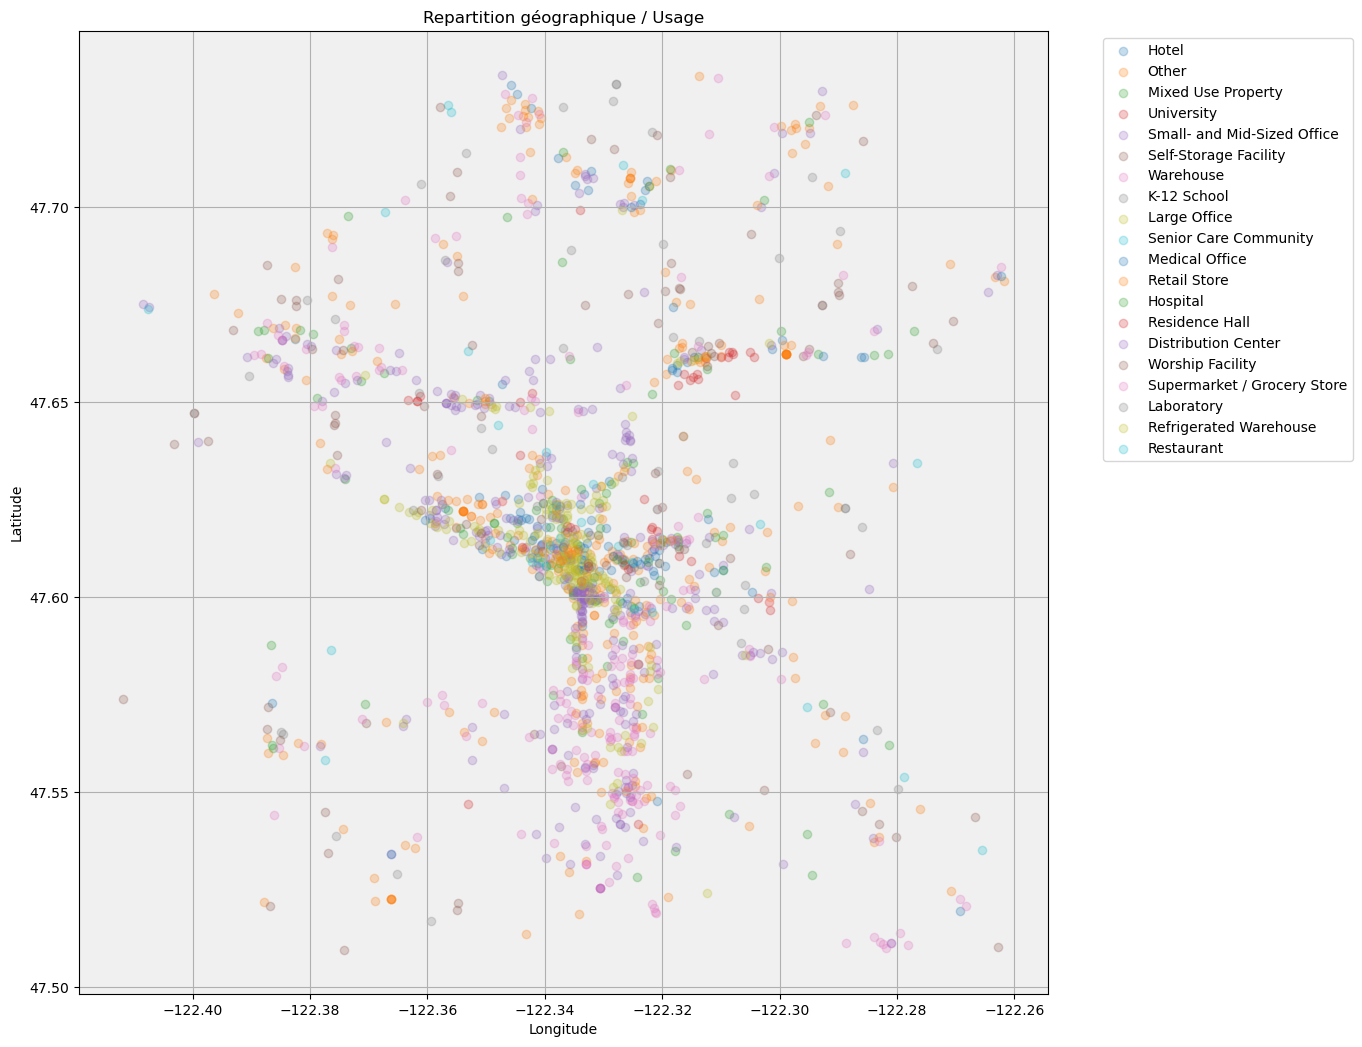

In [14]:
plt.figure(figsize=(12.5, 12.5))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Repartition géographique / Usage")
legend_handles = []
plt.gca().set_facecolor('#F0F0F0')
for i in values:
    handle = plt.scatter(Building_Energy_Benchmarking['Longitude'][Building_Energy_Benchmarking['PrimaryPropertyType']==i],
                Building_Energy_Benchmarking['Latitude'][Building_Energy_Benchmarking['PrimaryPropertyType']==i], alpha=0.25,
                         label = f'{i}')
    legend_handles.append(handle)
plt.legend(handles=legend_handles,bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()

Le scatterplot ci-dessus est basé la lattitude et la longitude des bâtiments, et nous pouvons y observer une mappe originale de la ville de Seattle, dans lequel nous pouvons clairement voire une forte concentration de nos individus au niveau du downtown. Au delà ce ça, malgré la détection de valeurs abérrantes, la vue de cette carte ne nous permet pas de les considérer comme tel.

Profitons-en pour visualiser la répartition de géographique de nos valeurs quantitatives les plus importantes comme démontré dans les 4 graphiques qui suivent : 

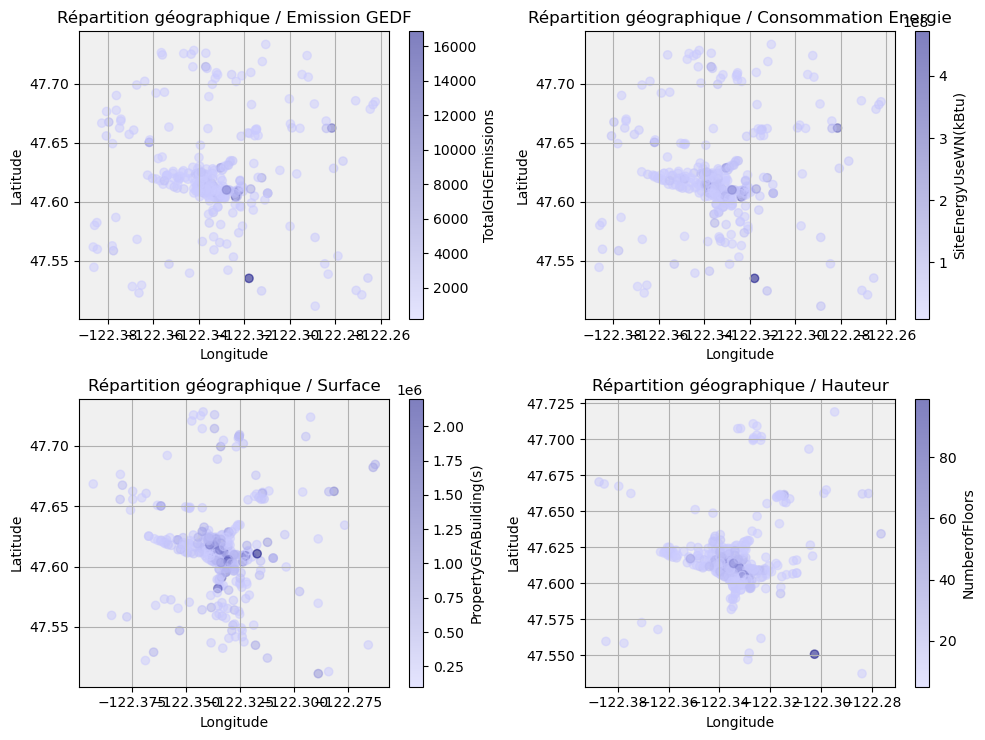

In [15]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.8, 0.8, 1), (0, 0, 0.5)]
custom_cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

plt.figure(figsize=(10, 7.5))

plt.subplot(2,2,1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Répartition géographique / Emission GEDF")
plt.gca().set_facecolor('#F0F0F0')
TotalGHGEmissions = Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['TotalGHGEmissions']>\
                                                     Building_Energy_Benchmarking['TotalGHGEmissions'].mean()]
scatter = plt.scatter(TotalGHGEmissions['Longitude'], TotalGHGEmissions['Latitude'],
                      c=TotalGHGEmissions['TotalGHGEmissions'], cmap=custom_cmap, alpha=0.5)
plt.colorbar(scatter, label='TotalGHGEmissions')
plt.grid()

plt.subplot(2,2,2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Répartition géographique / Consommation Energie")
plt.gca().set_facecolor('#F0F0F0')
SiteEnergyUseWN = Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['SiteEnergyUseWN(kBtu)']>\
                                                     Building_Energy_Benchmarking['SiteEnergyUseWN(kBtu)'].mean()]
scatter = plt.scatter(SiteEnergyUseWN['Longitude'], SiteEnergyUseWN['Latitude'],
                      c=SiteEnergyUseWN['SiteEnergyUseWN(kBtu)'], cmap=custom_cmap, alpha=0.5)
plt.colorbar(scatter, label='SiteEnergyUseWN(kBtu)')
plt.grid()

plt.subplot(2,2,3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Répartition géographique / Surface")
plt.gca().set_facecolor('#F0F0F0')
PropertyGFABuilding = Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['PropertyGFABuilding(s)']>\
                                                     Building_Energy_Benchmarking['PropertyGFABuilding(s)'].mean()]
scatter = plt.scatter(PropertyGFABuilding['Longitude'], PropertyGFABuilding['Latitude'],
                      c=PropertyGFABuilding['PropertyGFABuilding(s)'], cmap=custom_cmap, alpha=0.5)
plt.colorbar(scatter, label='PropertyGFABuilding(s)')
plt.grid()

plt.subplot(2,2,4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Répartition géographique / Hauteur")
plt.gca().set_facecolor('#F0F0F0')
NumberofFloors = Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking['NumberofFloors']>\
                                                     Building_Energy_Benchmarking['NumberofFloors'].mean()]
scatter = plt.scatter(NumberofFloors['Longitude'], NumberofFloors['Latitude'],
                      c=NumberofFloors['NumberofFloors'], cmap=custom_cmap, alpha=0.5)
plt.colorbar(scatter, label='NumberofFloors')
plt.grid()

plt.tight_layout()
plt.show()

Dans ces 4 graphiques sont représentés les individus dont les valeurs de chaque feature dépasse la moyenne. Là aussi, nous pouvons observer des valeurs nettement plus élevées concentrées autour du Downtown.

Nous allons maintenant étudier les valeurs de la variable "NumberofBuildings" : 

In [16]:
outliers['NumberofBuildings']['NumberofBuildings'].value_counts().sort_index()

NumberofBuildings
2.0     12
3.0     12
4.0      3
5.0      6
6.0      2
8.0      1
10.0     1
11.0     1
14.0     2
23.0     1
27.0     1
Name: count, dtype: int64

In [17]:
outliers['NumberofBuildings'].loc[outliers['NumberofBuildings']['NumberofBuildings']!=0].sort_values(by='NumberofBuildings',
                                                                                                     ascending=False).head(10)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,
172,University,SSCC MAIN CAMPUS,DELRIDGE,47.54700,-122.35307,27.0,2,0,46,441071,66.09,33.91,0.0,100.0,866.23,41151732.00,NaN
23622,Other,FT C15 Fishermen's Center,MAGNOLIA / QUEEN ANNE,47.65561,-122.38063,23.0,1,0,61,260241,79.07,20.93,0.0,100.0,565.55,36034584.00,NaN
261,Large Office,South Park,GREATER DUWAMISH,47.52429,-122.31234,14.0,2,31874,36,302494,84.77,15.23,0.0,100.0,748.55,54136068.00,NaN
25251,University,5th Avenue Master Meter,MAGNOLIA / QUEEN ANNE,47.65019,-122.36173,14.0,2,0,71,537000,24.96,75.04,0.0,100.0,3768.66,96775464.00,NaN
211,University,NSCC MAIN CAMPUS,NORTHWEST,47.69936,-122.33401,11.0,2,111625,46,582447,93.20,6.80,0.0,100.0,362.82,37410800.00,NaN
24086,Other,(ID#24086)Campus1:KC Metro Transit Atlantic Ce...,GREATER DUWAMISH,47.59042,-122.32498,10.0,0,0,25,230971,73.35,26.65,0.0,100.0,405.05,22230844.00,NaN
49705,Other,Magnuson,NORTHEAST,47.68212,-122.26330,8.0,0,0,87,502030,50.68,49.32,0.0,100.0,549.11,20672948.00,NaN
516,Other,Aurora Shopping Center,NORTHWEST,47.72546,-122.34659,6.0,1,0,52,111900,65.11,34.89,0.0,100.0,226.43,10079993.00,NaN
27389,Small- and Mid-Sized Office,Leschi Lakecenter,CENTRAL,47.60207,-122.28481,6.0,2,0,60,75868,100.00,0.00,0.0,100.0,25.14,3605749.75,NaN


Ici, sont considérés comme aberrants tout individu dont le nombre de bâtiment dépasse la valeur 1. En termes d'approche métier, nous ne pouvons donc pas en déduire que ces individus devraient être retiré de l'équation, d'autant plus qu'il s'agit pour une grande majorité d'Universités et de complexes commerciaux, occupant par définition plus d'un seul bâtiment.

Observons maintenant les valeurs abérrantes du côté de la variable "NumberofFloors" : 

In [18]:
outliers['NumberofFloors'].sort_values(by='NumberofFloors',ascending=False).head(10)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,
21611,Worship Facility,Seattle Chinese Baptist Church,GREATER DUWAMISH,47.55072,-122.30265,1.0,99,0,39,21948,100.00,0.00,0.00,100.00,2.27,3.260012e+05,80.0
775,Large Office,Columbia Center - 2015,DOWNTOWN,47.60454,-122.33072,1.0,76,319400,31,1632820,94.53,5.47,0.00,100.00,882.56,9.253726e+07,86.0
357,Large Office,Seattle Municipal Tower (2030),DOWNTOWN,47.60501,-122.32988,1.0,63,159600,26,1195387,100.00,0.00,0.00,100.00,429.27,6.157618e+07,89.0
422,Large Office,Two Union Square,DOWNTOWN,47.61043,-122.33206,1.0,56,389860,27,1215718,93.06,5.09,1.85,100.00,525.78,5.098450e+07,97.0
399,Large Office,1201 Third Avenue,DOWNTOWN,47.60723,-122.33611,1.0,55,285000,28,1115000,93.21,2.69,4.11,100.01,588.90,5.514030e+07,92.0
353,Large Office,Safeco Plaza,DOWNTOWN,47.60615,-122.33388,1.0,49,368980,47,754455,84.98,15.02,0.00,100.00,627.87,4.751812e+07,89.0
345,Large Office,999 Third Avenue,DOWNTOWN,47.60505,-122.33427,1.0,47,0,33,1323055,99.64,0.36,0.00,100.00,318.97,4.468366e+07,94.0
402,Large Office,US Bank Centre,DOWNTOWN,47.61054,-122.33466,1.0,46,512608,27,1023998,94.81,5.19,0.00,100.00,530.18,5.850684e+07,89.0
772,Large Office,800 Fifth Avenue,DOWNTOWN,47.60573,-122.33028,1.0,42,201121,35,1047934,100.00,0.00,0.00,100.00,264.78,3.951836e+07,95.0


Ici, nous pouvons effectivement reprérer une valeur abérrante : la "Seattle Chinese Baptist Church". Contrairement à la grande majorité des autres individus, ce bâtiment n'est pas situé en downtown et son activité principale n'est pas "Large Office". De plus, si les gratte-ciels peuvent atteindre un nombre impressionnant d'étages, ceux pouvant aller jusqu'à 99 sont assez rares et aucun n'a jamais été conçus pour être un lieu de culte! Ainsi, plutôt que de supprimer cette ligne, nous allons plutôt remplacer la valeur de sa variable "NumberofFloors" par 1, ce qui semble bien plus logique.

Intéressons-nous maintenant aux variables "PropertyGFABuilding(s)" et "PropertyGFAParking". Dans ce contexte, les surfaces dédiées au parking ayant des valeurs abérrantes peuvent éventuellement être considérées comme tel si par exemple elles dépassent celles des surfaces dédiées au bâti :

In [19]:
Building_Energy_Benchmarking.loc[Building_Energy_Benchmarking.index=='21611','NumberofFloors']=1

outliers['PropertyGFAParking'].loc[outliers['PropertyGFAParking']['PropertyGFAParking']>\
                                   outliers['PropertyGFAParking']['PropertyGFABuilding(s)']]\
.sort_values(by='PropertyGFAParking',ascending=False).head(10)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,
438,Medical Office,1101 Madison Tower,EAST,47.60921,-122.32425,1.0,14,407795,24,282363,100.00,0.00,0.0,100.0,147.49,21156670.0,58.0
263,Other,Building 1,NORTH,47.70281,-122.32532,1.0,6,335109,8,84739,76.58,23.42,0.0,100.0,162.41,9238992.0,NaN
801,Other,NORTH BLDG,NORTHEAST,47.66478,-122.29804,1.0,6,272900,14,88498,85.96,14.04,0.0,100.0,119.92,9158207.0,NaN
49865,Other,SOUTH,NORTHEAST,47.66246,-122.29898,1.0,6,239252,3,65773,47.50,52.50,0.0,100.0,809.76,26532170.0,NaN
56,Hotel,Seattle Hilton Hotel,DOWNTOWN,47.60946,-122.33337,1.0,24,205970,47,126240,75.51,24.49,0.0,100.0,295.33,16163194.0,67.0
692,Other,2323 Elliott,DOWNTOWN,47.61234,-122.34897,1.0,6,197130,33,78852,100.00,0.00,0.0,100.0,36.49,5233553.5,NaN
371,Mixed Use Property,METROPOLITAN PARK NORTH (ID371),DOWNTOWN,47.61770,-122.33060,1.0,11,195621,16,185760,99.04,0.96,0.0,100.0,72.42,9944328.0,94.0
500,Supermarket / Grocery Store,70100179-Lake City,NORTH,47.72370,-122.29232,1.0,2,187878,21,121087,73.60,26.40,0.0,100.0,277.98,14843382.0,78.0
532,Other,Ballard Blocks I,BALLARD,47.66233,-122.37480,1.0,5,182454,8,140415,62.67,37.33,0.0,100.0,413.35,17628306.0,NaN


In [20]:
outliers['PropertyGFABuilding(s)'].loc[outliers['PropertyGFABuilding(s)']['PropertyGFAParking']>\
                                   outliers['PropertyGFABuilding(s)']['PropertyGFABuilding(s)']]\
.sort_values(by='PropertyGFABuilding(s)',ascending=False)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,


Il existe effectivement certains individus dont la surface dédiée au parking dépasse celle dédiée au bâti. Cependant, n'oublions pas que notre sujet d'étude gravite autour de l'agglomération de Seattle, grande ville Américaine présentant un nombre particulièrement important de traits caractéristiques communes à la très grande majorité des villes des Etats-Unis d'Amérique. Par ceux-là se trouve le fait que Seattle a été fondé et s'est développée à partir d'un espace quasi-illimité et en parallèle à l'essor de l'industrie automobile. Les espaces dédiées aux véhicules motorisés à Seattle y sont dès lors nettement plus significatifs que dans les zones urbaines d'autre pays, notamment d'Europe. C'est pour toutes ces raisons que nous ne nous permettrons pas d'intervenir sur ces données.

Intéressons-nous maintenantà la variable représentant le ratio de la vapeur dans la consommation totale d'énergie. Contrairement à ceux de l'électricité et du gaz, certains bâtiments présentent des valeurs considérées comme sortant de la norme dans leurs part de consommation de vapeur. Regardons cela de plus près : 

In [21]:
outliers['SteamUse(%)'].loc[outliers['SteamUse(%)']['Total']!=100].sort_values(by='Total').head(10)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,
106,Other,Armory,MAGNOLIA / QUEEN ANNE,47.62208,-122.35398,1.0,5,0,78,396085,34.61,0.00,46.59,81.20,804.20,2.125784e+07,NaN
21436,Other,Seattle Children's Theatre,MAGNOLIA / QUEEN ANNE,47.62082,-122.35251,1.0,2,0,24,40600,60.73,15.07,5.55,81.35,41.06,2.470816e+06,NaN
103,Other,Key Arena,MAGNOLIA / QUEEN ANNE,47.62208,-122.35398,1.0,1,0,54,389000,60.95,2.91,25.75,89.61,607.41,2.373692e+07,NaN
112,Other,McCaw Hall,MAGNOLIA / QUEEN ANNE,47.62395,-122.35143,1.0,2,0,88,262048,65.21,0.00,24.79,90.00,490.73,2.082352e+07,NaN
110,Other,Exhibition Hall,MAGNOLIA / QUEEN ANNE,47.62395,-122.35077,1.0,2,0,54,52000,47.44,0.00,44.10,91.54,101.83,2.682243e+06,NaN
21465,Other,Playhouse,DOWNTOWN,47.60219,-122.33130,1.0,1,0,54,36314,60.59,21.36,11.17,93.12,44.33,1.882953e+06,NaN
21464,Other,Phelps Center,DOWNTOWN,47.60192,-122.33282,1.0,1,0,50,49680,46.05,0.00,50.19,96.24,119.34,2.890474e+06,NaN
104,Other,Bagley Wright Theatre,MAGNOLIA / QUEEN ANNE,47.62208,-122.35398,1.0,1,0,54,91213,46.11,0.00,50.61,96.72,344.20,8.181881e+06,NaN
49725,Other,VM Seattle Hospital & Medical Center - Jones P...,EAST,47.60989,-122.32659,1.0,7,0,4,267470,55.88,0.00,43.56,99.44,1597.56,4.271554e+07,NaN


Ces bâtiments ont pour point commun une activité non-définie de manière précise, ce qui constitue notre premier frein à toute intervention de nettoyage de nos données. Le deuxième frein réside dans le fait que la colonne "Total", devant supposémment montrer une grande majorité de valeurs inférieures ou égales à 100, ne présente aucune valeur dépassant justement les 100. AInsi, même si le pourcentage de la vapeur est plus élevée que la moyenne, il obéit à la logique de répartition entre vapeur, gas et électricité.

Pour la dernière partie de notre traitement des valeurs aberrantes, nous allons observer de plus près celles qui ont été détectée dans nos 2 variables cibles. Avant toute chose, il serait intéressant d'étudier le degré de corrélation qui existe entre ces 2 variables. En effet, pour des raisons de logique écologique, nous savons pertinemment qu'il existe un lien évident entre la quantité d'énergie consommé d'un bâtiment et celle de gaz à effet de serre émis par ce dernier.

Le graphique qui va suivre va donc nous permettre 2 choses : 
- Examiner l'importance du degré de corrélation entre nos 2 variables cibles et étudier les valeurs considérées comme aberrantes en conséquence.
- Examiner le niveau de corrélation existant entre chacun de nos features de nature quantitative. La création de modèles prédictifs exige en effet une base de données de départ qui soit homogène. Dans cette démarche, une corrélation trop importante entre 2 variables signifierait soit que l'une d'elles est superflue et peut être écartée de nos base de données, soit que ces 2 variables peuvent fusionner. Dans les 2 cas, le nombre de features se réduit, et c'est ce que nous veillerons à faire ici grâce au tableau qui va suivre qui représente la matrice de corrélation de notre base de données actuelle : 

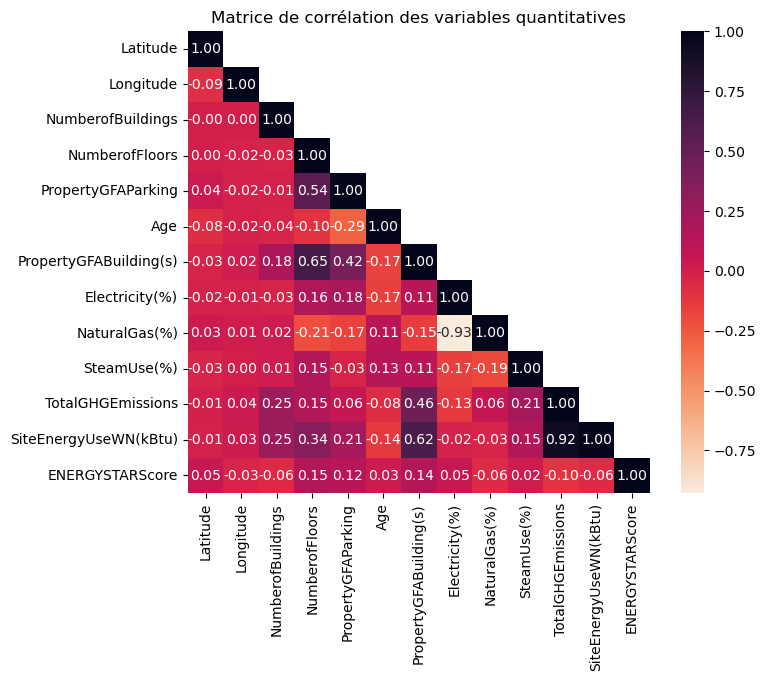

In [22]:
import seaborn as sns
import numpy as np

Building_Energy_Benchmarking.drop(columns=['Total'], inplace=True)

elements = [col for col in Building_Energy_Benchmarking.columns if Building_Energy_Benchmarking[col].dtype != object]

plt.figure(figsize=(8, 6))
cmap = sns.cm.rocket_r
mask = np.triu(np.ones_like(Building_Energy_Benchmarking[elements].corr(), dtype=bool), k=1)
sns.heatmap(Building_Energy_Benchmarking[elements].corr(), mask=mask, annot=True, cmap=cmap, fmt=".2f", square=True)
plt.title('Matrice de corrélation des variables quantitatives')
plt.show()

Comme l'on pouvait se douter, la corréation entre la variable "TotalGHGEmissions" et "SiteEnergyUseWN(kBtu)" est considérablement élevé. Nous pouvons également observer une anti-corrélation tout aussi importante entre les variables "Electricity(%)" et "NaturalGas(%), ce qui là aussi tout à fait logique, étant qu'il s'agit de ratios : plus la part de l'un est augmente, plus celle de l'autre diminue.

Quoi qu'il en soit, en partant du principe que nos 2 variables cibles augmentent quasiment au même rythme, théoriquement, si un individu présente une valeur considérée comme abérrante dans l'une de ces variables, elle devrait tout autant en présenter une dans l'autre. Nous allons donc vérifier cette hypothèse entre consultant nos 2 listes en ne conservant que celles qui n'obéissent pas à cette règle : 

In [23]:
TGHGE = outliers['TotalGHGEmissions'].index

SEUWN = outliers['SiteEnergyUseWN(kBtu)'].index

Index = Building_Energy_Benchmarking.loc[(Building_Energy_Benchmarking.index.isin(TGHGE))&\
                                 (Building_Energy_Benchmarking.index.isin(SEUWN))].index

outliers['SiteEnergyUseWN(kBtu)'].loc[~outliers['SiteEnergyUseWN(kBtu)'].index.isin(Index)]\
.sort_values(by='SiteEnergyUseWN(kBtu)',ascending=False).head(10)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,
295,Other,1122 3rd Ave,DOWNTOWN,47.60699,-122.33481,1.0,15,0,61,230880,100.00,0.00,0.00,100.00,433.60,61674856.0,NaN
357,Large Office,Seattle Municipal Tower (2030),DOWNTOWN,47.60501,-122.32988,1.0,63,159600,26,1195387,100.00,0.00,0.00,100.00,429.27,61576184.0,89.0
659,Large Office,Russell Investments Center,DOWNTOWN,47.60740,-122.33777,1.0,42,0,11,1592914,97.57,0.69,1.75,100.01,481.06,56785916.0,97.0
388,Large Office,Rainier Tower,DOWNTOWN,47.60896,-122.33481,1.0,42,0,40,635824,100.00,0.00,0.00,100.00,337.97,48479988.0,69.0
465,Large Office,1000 Denny Building,LAKE UNION,47.61907,-122.33651,1.0,8,0,87,287819,99.48,0.52,0.00,100.00,349.07,48037000.0,NaN
758,Other,Pacific Place,DOWNTOWN,47.61289,-122.33531,1.0,0,0,17,947987,100.00,0.00,0.00,100.00,324.25,46343304.0,NaN
345,Large Office,999 Third Avenue,DOWNTOWN,47.60505,-122.33427,1.0,47,0,33,1323055,99.64,0.36,0.00,100.00,318.97,44683660.0,94.0
46,Warehouse,Seattle 11-13,GREATER DUWAMISH,47.51138,-122.28875,3.0,2,0,55,714095,100.00,0.00,0.00,100.00,311.84,44110016.0,NaN
328,Large Office,1600 Seventh,DOWNTOWN,47.61316,-122.33430,1.0,33,0,40,791396,99.98,1.32,0.00,101.30,313.30,42227404.0,89.0


In [24]:
outliers['TotalGHGEmissions'].loc[~outliers['TotalGHGEmissions'].index.isin(Index)].sort_values(by='TotalGHGEmissions',
                                                                                                ascending=False).head(10)

,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFAParking,Age,PropertyGFABuilding(s),Electricity(%),NaturalGas(%),SteamUse(%),Total,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,
45927,Laboratory,Reasearch and Training Building,EAST,47.604270,-122.323110,1.0,8,0,16,178000,41.64,0.00,58.36,100.00,2549.47,55068016.0,NaN
49926,University,SCCC MAIN BROADWAY/EDISON,EAST,47.617484,-122.321853,1.0,3,0,91,428347,59.24,4.15,36.62,100.01,1280.81,38977108.0,NaN
23311,Medical Office,HART First Hill LLC,EAST,47.608620,-122.323720,1.0,0,0,71,274568,47.47,0.00,52.53,100.00,1110.07,25358122.0,52.0
387,Large Office,Puget Sound Plaza,DOWNTOWN,47.608690,-122.335880,1.0,21,0,56,298426,52.87,0.00,47.13,100.00,1084.79,28559888.0,79.0
314,Hotel,Edgewater Seattle,DOWNTOWN,47.612400,-122.350750,1.0,4,0,55,122309,24.84,75.16,0.00,100.00,1060.13,26122018.0,8.0
383,Large Office,Smith Tower,DOWNTOWN,47.601980,-122.331740,1.0,42,0,104,304346,48.32,47.32,4.36,100.00,741.30,24880988.0,72.0
23310,Other,Charles & Emma Frye Free Public Art Museum,EAST,47.607090,-122.324160,1.0,1,0,65,47699,39.81,0.77,59.42,100.00,712.39,14745217.0,NaN
656,Medical Office,Arnold Pavilion,EAST,47.609790,-122.322980,1.0,0,0,12,225982,61.99,0.00,38.01,100.00,692.12,20764814.0,53.0
114,Large Office,Bill and Melinda Gates Foundation,MAGNOLIA / QUEEN ANNE,47.624190,-122.344430,1.0,6,303707,6,616891,75.26,24.74,0.00,100.00,674.09,38105108.0,93.0


Force est de constater qu'un nombre non-négligeable de bâtiments n'obéissent pas nécessairement à cette règle. Pour autant, là aussi, nous ne pouvons pas considérer ces chiffres comme abérrants car ils demeurent explicables :
- Si un bâtiment consomme une quantité particulièrement élevée d'énergie tout en conservant une quantité émise de gaz à effet de serre restant dans la moyenne, c'est qu'il a davantage recours à des énergies plus vertes plutôt qu'à des énergies polluantes. Dans notre cas de figure, la consommation d'électricité émet nettement moins de gaz à effet de serre que celle du gaz naturel et c'est pourquoi l'ensemble des bâtiments de notre première liste ont en commun un part de consommation liée à l'électricité particulièrement élevée par rapport à celles du gaz naturel et de la vapeur.
- Inversement, un bâtiment émettant une quantité de gaz à effet de serre considérablement élevée alors que sa consommation globale d'énergie, elle, ne l'est pas particulièrement démontre que ce bâtiment constitue une source de pollution significative et donc, par extension, une problématique majeure dans l'atteinte des objectifs de neutralité carbone de la ville de Seattle. Cela se traduit donc par une part de consommation plus élevée du gaz naturel et une part de consommation d'électricité nettement plus faible.

Ce qui est commun à nos 2 cas de figures, ce sont les informations précieuses qu'ils nous fournissent. Ces informations peuvent de ce fait être considérées comme capitales dans la conception prochaine de nos modèles prédictifs. Voilà pourquoi, au final, assez peu de traitement des données aberrantes ont été à faire dans notre base de données.

Avant de passer enfin à la création de notre premier modèle, nous allons nous intéresser à la répartition globale de nos valeurs quantitatives. Nous allons donc créer une série d'histogrammes et vérifier si chacune de nos variables obéissent à une loi normale ou, dans le cas contraire, si cela est explicable :

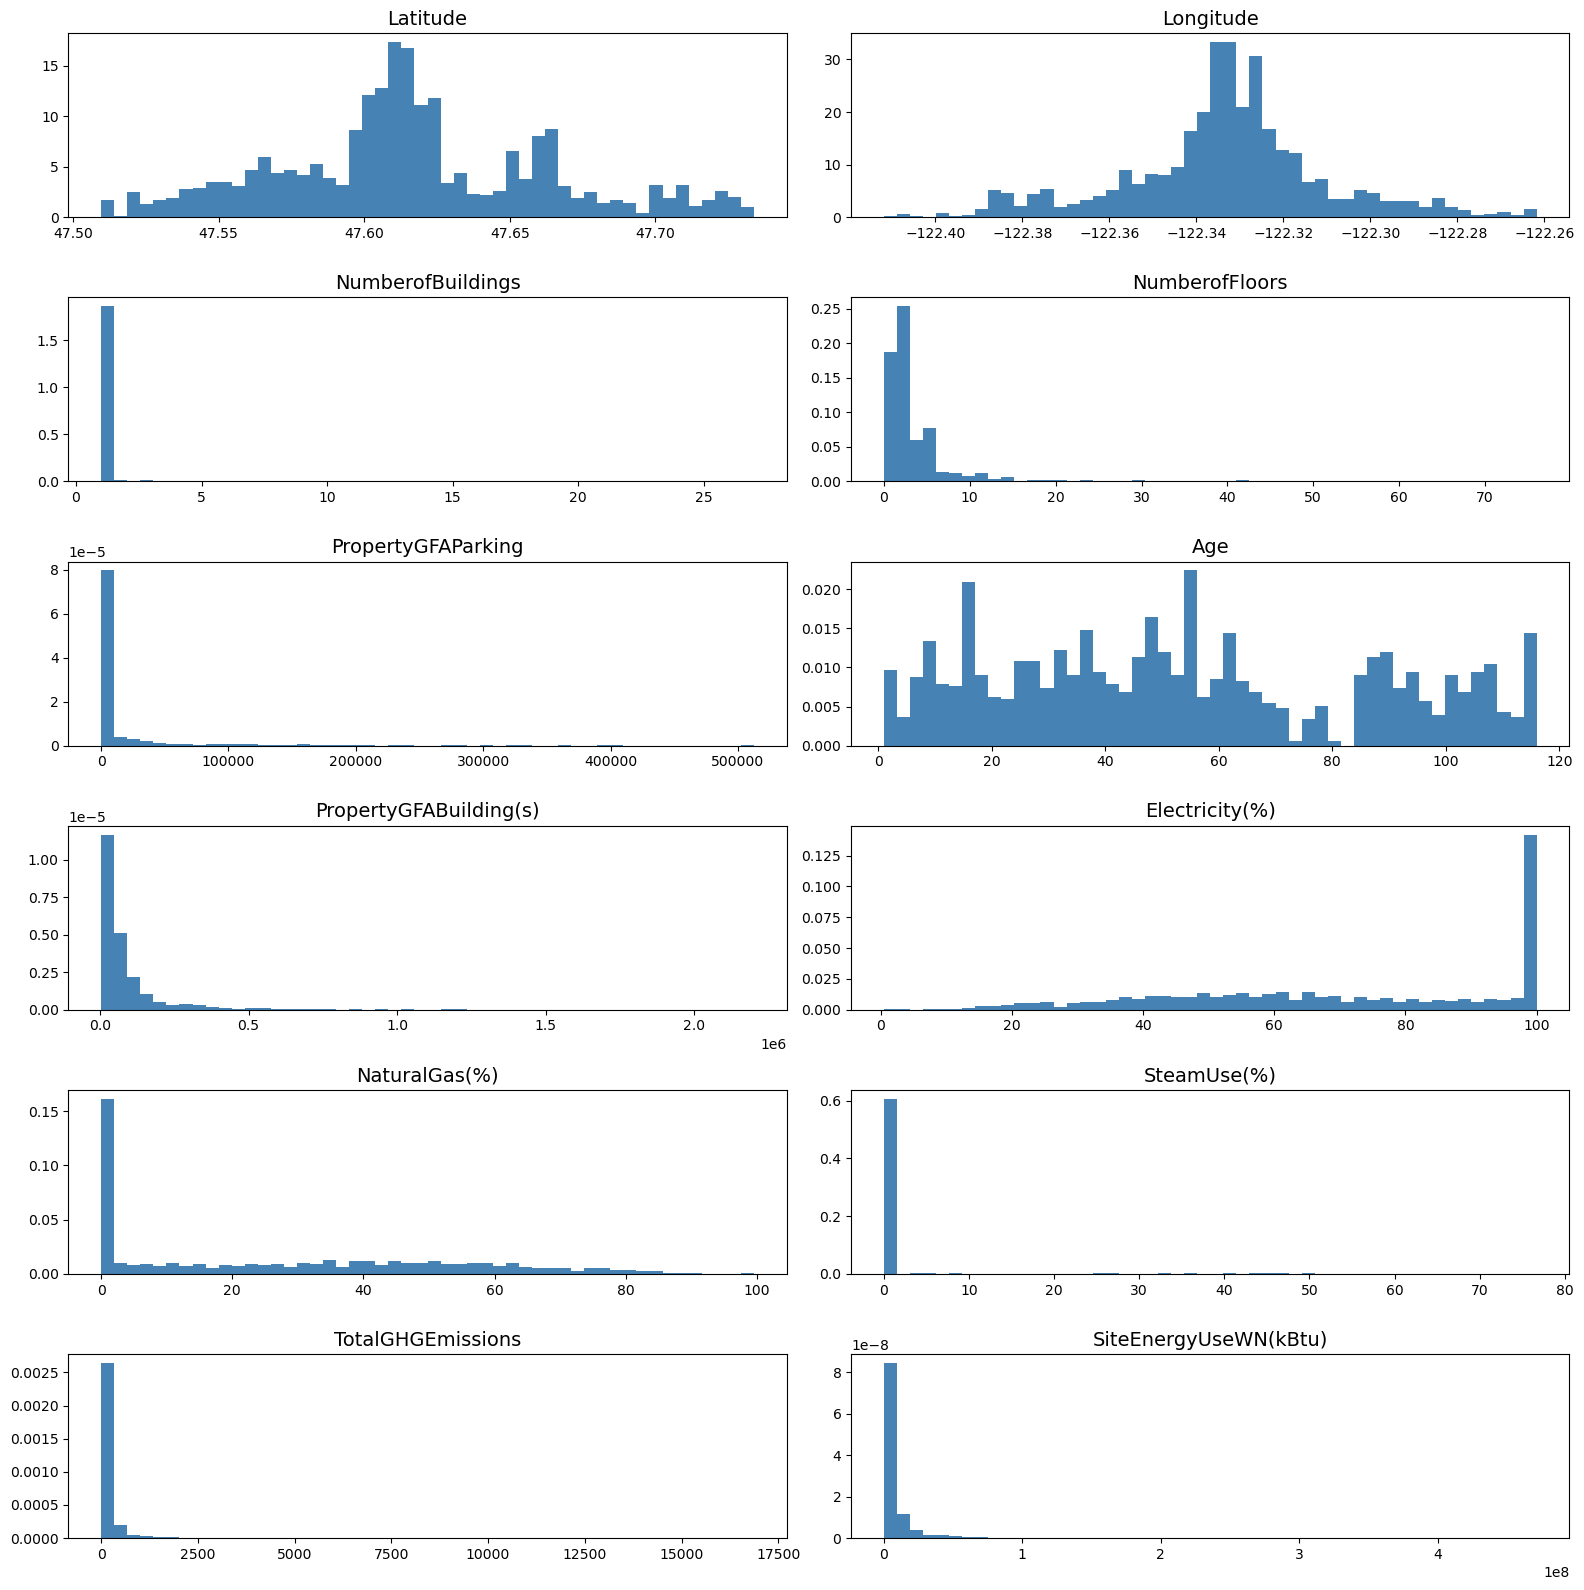

In [25]:
X = Building_Energy_Benchmarking[elements].values

fig, axes = plt.subplots(6, 2, figsize=(16, 16))

for feat_idx, ax in enumerate(axes.flatten()):
    col_name = elements[feat_idx]
    ax.hist(X[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(str(col_name), fontsize=14)
    
plt.tight_layout()
plt.show()

Dans l'ensemble, nos variables quantitatives obéissent à une loi normale de répartition. Cependant, il existe bel et bien des variables qui font exception : "Electricity(%)", "Age", "Latitude" et "Longitude". Pour autant, nous avons vu précedemment qu'aucune de ces variables ne présentaient d'erreur parmi leurs valeurs. D'autant plus que l'on peut considérer les valeurs de ces variables comme catégoriques (et non pas catégorielles) ou bien factuelles, dans le sens où la position géographique et l'âge d'un bâtiment ne peuvent en aucun cas être altérées. Cela étant dit, nous pouvons désormais considérer notre base de données comme 100% opérationnelle.

# II. Développement & Simulation d'un Premier Modèle<a name=7 ></a>

Maintenant que nous disposons d'une base de données à partir de laquelle nous pouvons modéliser, il est temps de débuter ce pour quoi l'étude ci-présente a été établie. Pour le développement de notre premier modèle, nous allons nous baser sur celui de la régression linéaire, qui consistue un des modèles les plus basiques pour prédire des variables quantitatives.

Le modèle de régression linéaire est une méthode statistique utilisée pour prédire la valeur d'une variable quantitative en fonction d'une ou plusieurs autres variables. Il repose sur l'hypothèse qu'il existe une relation linéaire entre la variable cible et les features. La forme générale d'un modèle de régression linéaire simple est y = ax + b où y est la variable cible, x le feature, a l'ordonnée à l'origine et b le coefficient de régression. Le modèle de régression linéaire permet d'estimer les paramètres a et b de manière à minimiser la somme des carrés des écarts entre les valeurs observées et les valeurs prédites de y.

Nous avons donc 2 variables cibles que nous voulons prédire : les émissions totales de gaz à effet de serre et la consommation d'énergie d'un bâtiment. Pour cela nous allons procéder à une série d'étapes : 
- Retrait des variables cibles et autres features dont nous n'aurons pas besoin des données globales pour pouvoir entraîner le modèle à les prédire.
- Division des données en 2 parties : un ensemble d'entraînement (80% des données) utilisé pour entraîner le modèle et un ensemble de test (20% des données) utilisé pour tester les performances du modèle une fois qu'il est entraîné. Cela nous aide à voir comment le modèle fonctionne sur des données qu'il n'a jamais vues auparavant.
- Préparation des données pour l'entraînement du modèle : 
    - Normalisation : ajustement des valeurs des données pour qu'elles soient sur une même échelle. Cela aide le modèle à apprendre plus efficacement.
    - Encodage des Catégories : transformation les données textuelles (ici "PrimaryPropertyType" dont l'importance n'est plus à prouver) en un format numérique que le modèle peut comprendre.
- Application des transformations (normalisation et encodage) aux données d'entraînement pour les préparer à l'entraînement du modèle.

C'est une fois ces étapes de franchies que nous allons pouvoir créer et entraîner notre modèle de régression linéaire. Ce modèle sera ensuite utilisé pour faire des prédictions sur les données de test : 

In [26]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

target = ['TotalGHGEmissions','SiteEnergyUseWN(kBtu)']

elements.remove('TotalGHGEmissions')
elements.remove('SiteEnergyUseWN(kBtu)')
elements.remove('ENERGYSTARScore')

y = Building_Energy_Benchmarking[target]
X = Building_Energy_Benchmarking.drop(columns=target+['PropertyName', 'Neighborhood', 'ENERGYSTARScore'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=50)

standardscaler = StandardScaler().fit(X_train[elements])
onehotencoder = OneHotEncoder(handle_unknown='ignore').fit(X_train[['PrimaryPropertyType']])

def preprocess(X) : 
    X_encoded = pd.DataFrame(standardscaler.transform(X[elements]), columns=elements, index=X.index)
    X_categorical = pd.DataFrame(onehotencoder.transform(X[['PrimaryPropertyType']]).toarray(),
                                 columns=onehotencoder.get_feature_names_out(['PrimaryPropertyType']))
    X_categorical.index = X.index
    return pd.concat([X_encoded, X_categorical], axis=1)

X_train = preprocess(X_train)

def model(Model, target, metric, X_train, y_train, X_test, y_test) :
    model = Model
    model.fit(X_train,y_train[target])
    y_pred = model.predict(X_test)
    if metric == "r2" : 
        return print("R² =", r2_score(y_test[target], y_pred))
    if metric == "mae" : 
        return print("MAE =", mean_absolute_error(y_test[target], y_pred))
    if metric == "rmse" : 
        return print("RMSE =", mean_squared_error(y_test[target], y_pred, squared=False))
    
metric = ['r2','mae','rmse']

for i in target : 
    print("\n",i,":")
    for j in metric :
        model(LinearRegression(), i, j, X_train, y_train, preprocess(X_test), y_test)


 TotalGHGEmissions :
R² = -0.2751031014790737
MAE = 170.46318818813896
RMSE = 442.902852437957

 SiteEnergyUseWN(kBtu) :
R² = 0.3356788461843465
MAE = 5110950.258323863
RMSE = 12500303.099806316


Ci-dessus, nous pouvons voir les résultats de l'évaluation des performances des prédictions en ayant recours à 3 indices de performance. Ces indices nous aident à comprendre à quel degré les prédictions sont proches des valeurs réelles. Ainsi, pour chaque variable cible, nous avons entraîné un modèle et évalué ses performances en utilisant les 3 indices suivants :

- Le coefficient de détermination, ou R² : compare la qualité des prédictions par rapport à un modèle simple qui utiliserait seulement la moyenne des valeurs observées. Pour cela, il s'agit de quantifier la proportion de la variance des valeurs cibles qui est expliquée par les variables explicatives dans le modèle de régression.
- La moyenne des erreurs absolues, ou MAE : mesure la précision d'un modèle de prédiction. Pour cela, elle calcule la moyenne des écarts absolus entre les valeurs prédites par le modèle et les valeurs réelles observées. En termes simples, la MAE indique,  en moyenne, de combien les prédictions diffèrent des valeurs réelles.
- La racine carrée de la moyenne des erreurs quadratiques, ou RMSE : mesure également la précision d'un modèle de prédiction. Il s'agit ici de calculer la racine carrée de la moyenne des carrés des erreurs entre les valeurs prédites par le modèle et les valeurs réelles observées. Ici, le RMSE est sensible aux grandes erreurs, car les erreurs sont mises au carré avant d'être moyennées. Cela signifie que de grandes erreurs auront un impact plus important sur le RMSE, ce qui peut être utile pour détecter des modèles qui ont des prédictions particulièrement mauvaises. En résumé, le RMSE donne une idée de la précision globale du modèle, avec une emphase supplémentaire sur les grandes erreurs.

Dans notre cas de figure, il semblerait que notre modèle ne fonctionne pas bien. 

En effet, du côté de la variable "TotalGHGEmissions", nous avons un R² négatif, ce qui suggère que le modèle est est moins performant que le simple fait d'utiliser la moyenne des valeurs observées. De plus, les valeurs de MAE et RMSE, bien que différentes, montrent qu'il y a des écarts substantiels entre les valeurs prédites et les valeurs réelles. Par ailleurs le RMSE étant plus élevé que la MAE, il y a probablement quelques grandes erreurs dans les prédictions qui affectent le RMSE de manière significative.
Du côté de la variable "SiteEnergyUseWN(kBtu)", le modèle a une capacité prédictive modérée. Cependant, les valeurs élevées de MAE et RMSE indiquent que les prédictions du modèle sont globalement imprécises, avec des erreurs significatives dans les prédictions.

Dans nos 2 cas de figure, il ne fait aucun doute qu'il est nécessaire de retravailler le modèle. Pour illustrer cela, nous allons maintenant générer des graphiques de dispersion pour chaque variable cible, comparant visuellement les valeurs réelles aux valeurs prédites par un modèle de régression linéaire. Cela permettra une évaluation rapide de la performance du modèle en mettant en évidence les écarts entre les prédictions et les observations réelles :

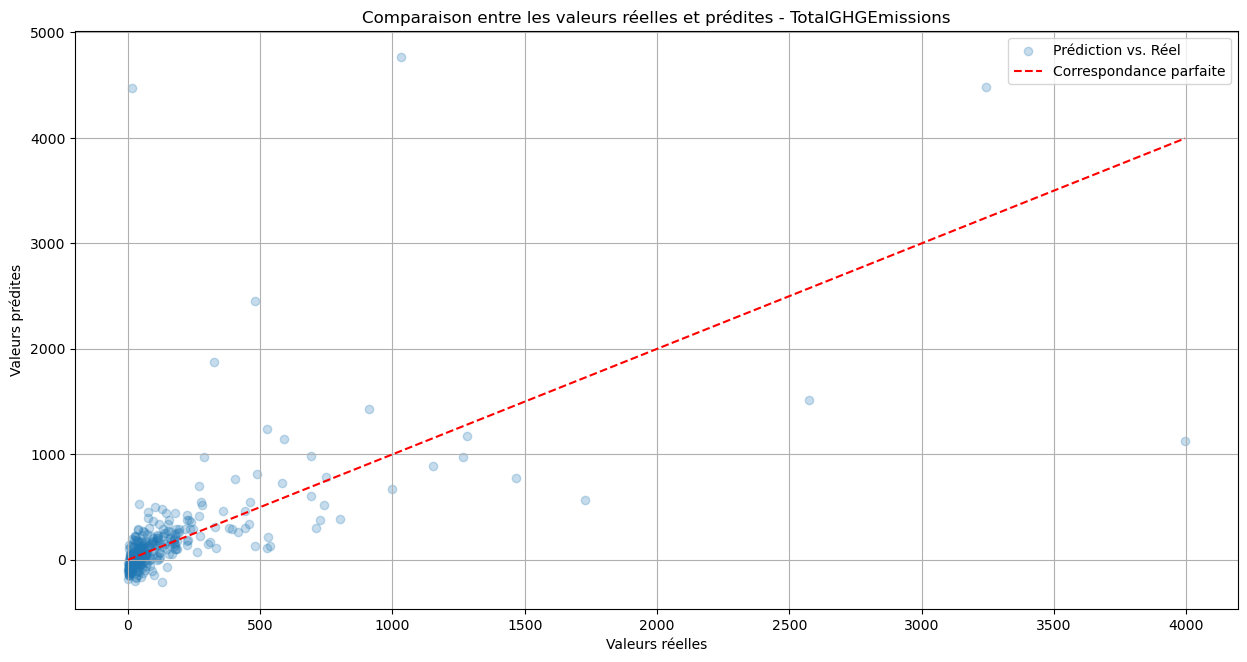

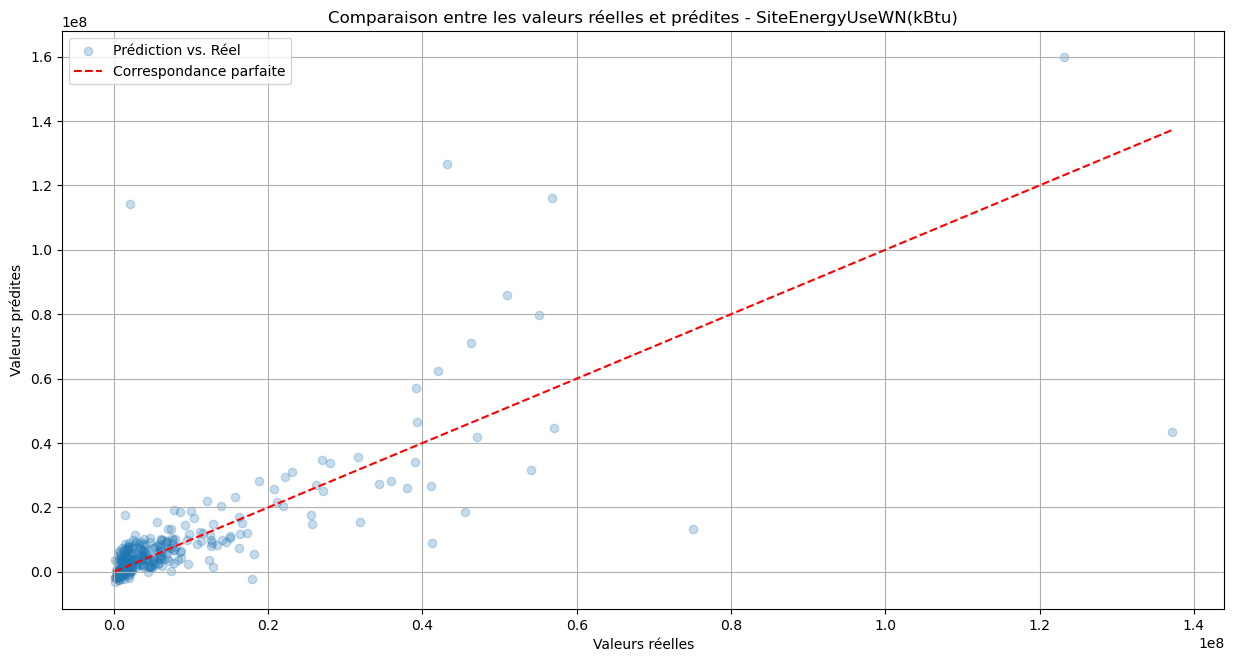

In [27]:
def graphic(Model, target, X_train, y_train, X_test, y_test) :
    model = Model
    model.fit(X_train,y_train[target])
    y_pred = model.predict(X_test)
    y_pred = pd.DataFrame(y_pred)
    plt.figure(figsize=(15, 7.5))
    plt.scatter(y_test[target], y_pred, alpha=0.25, label='Prédiction vs. Réel')
    plt.plot([y_test[target].min(), y_test[target].max()],
             [y_test[target].min(), y_test[target].max()], 
         color='red', linestyle='--', label='Correspondance parfaite')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Valeurs prédites')
    plt.title(f'Comparaison entre les valeurs réelles et prédites - {y_test[target].name}')
    plt.legend()
    plt.grid()
    plt.show()

for i in target : 
    graphic(LinearRegression(), i, X_train, y_train, preprocess(X_test), y_test)

Nous pouvons visualiser à très ces 2 graphiques qu'effectivement ce n'est pas encore tout à fait ça. Cependant, à notre décharge, nous avions auparavant pu constater que les valeurs de l'ensemble de nos données sont extrêmement hétérogènes, et ce plus particulièrement en fonction de la valeur affichée dans la variable "PrimaryPropertyType". La contre-performance de notre modèle était donc, sans mauvais jeu de mot, à prévoir. Pour pouvoir confirmer ces affirmations, nous pouvons recourir à la technique dite de validation croisée sur notre modèle.

La technique de la validation croisée, utilisée pour évaluer les performances d'un modèle d'apprentissage automatique, consiste à diviser l'ensemble de données en plusieurs sous-ensembles de taille égale. Le modèle est ainsi entraîné autant de fois qu'il existe de sous-ensembles soustrait à un que l'on conservera comme données de validation. Les performances du modèle sont ensuite mesurées sur chacun d'entre eux puis moyennées sur l'ensemble des itérations pour obtenir une estimation globale de la performance du modèle.

Afin de garantir un résultat optimal par cette technique, il nous faut au préalable sélectionner un nombre de sous-ensembles que l'on souhaite exploiter. C'est pourquoi nous allons ici appliquer notre technique de validation croisée en plusieurs fois avec le nombre de sous-ensembles qui différe à chaque procédure.

Nous allons ensuite afficher la performance de nos validations croisées à travers 6 graphiques, chacun correspondant à une variable cible x l'indice de performance : 

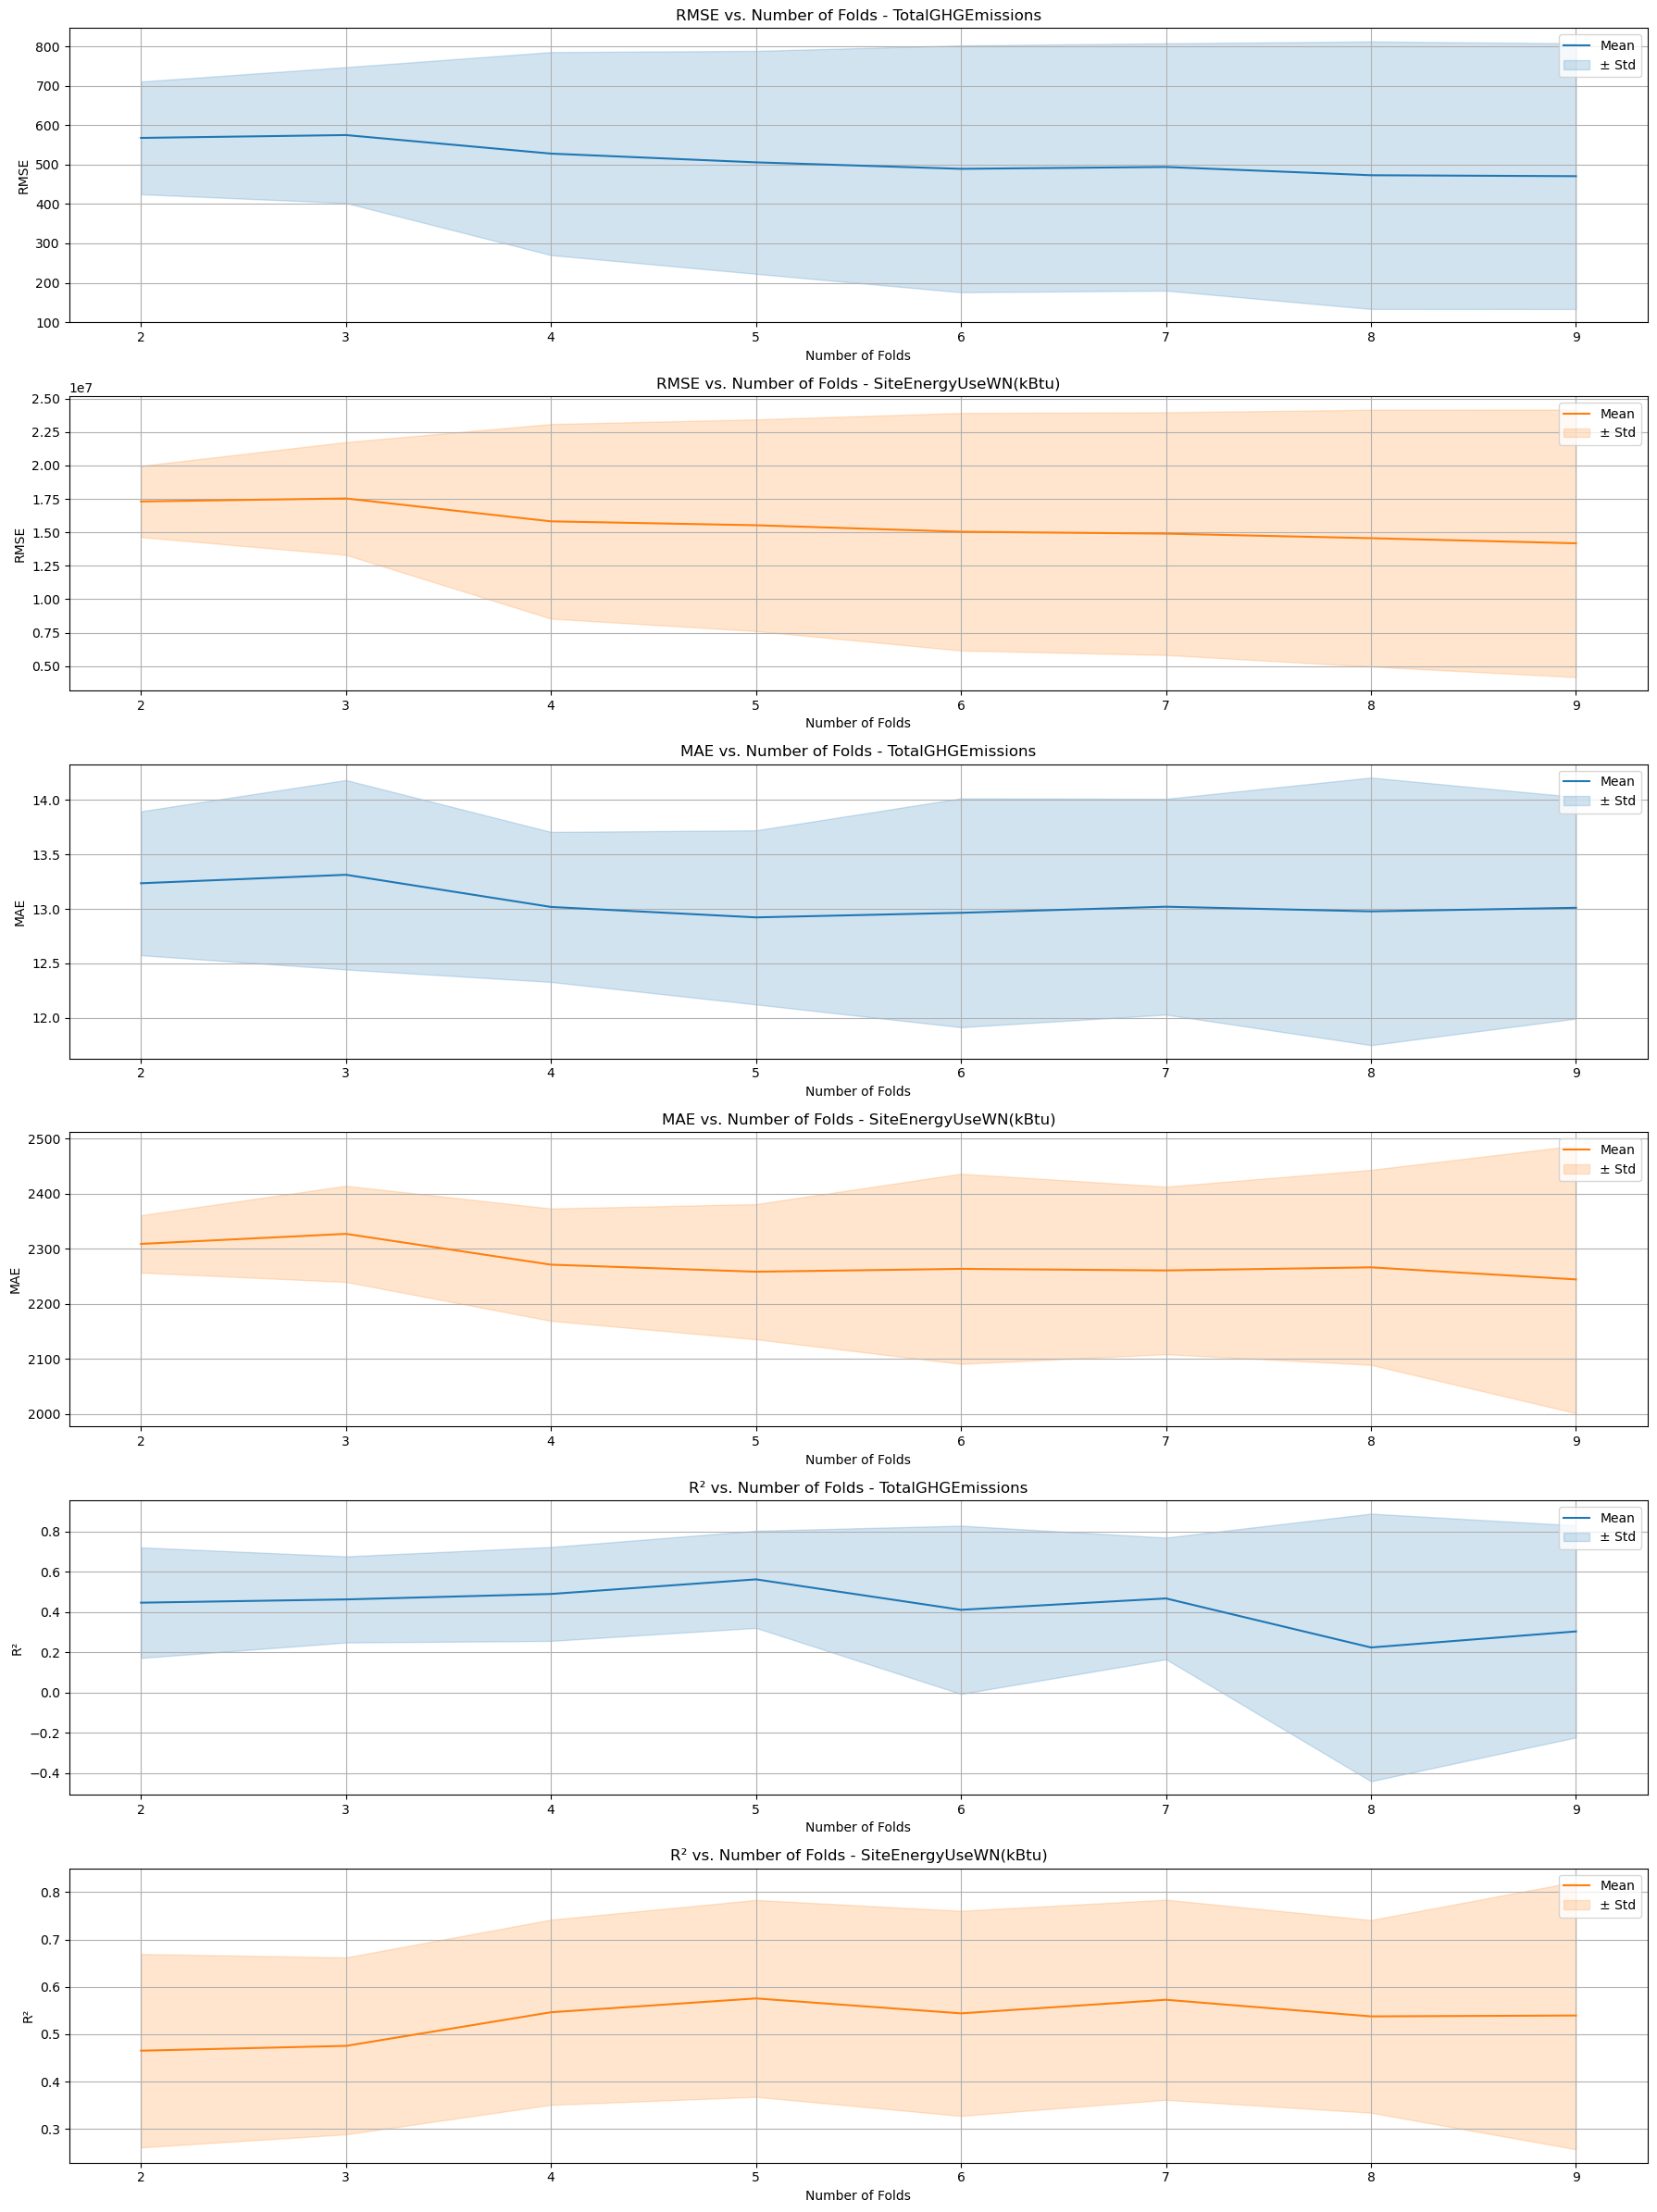

In [28]:
from sklearn.model_selection import cross_val_score

metrics = {'RMSE': 'neg_mean_squared_error', 'MAE': 'neg_mean_absolute_error', 'R²': 'r2'}

palette = {'TotalGHGEmissions': 'tab:blue', 'SiteEnergyUseWN(kBtu)': 'tab:orange'}

plt.figure(figsize=(18, 24))

for idx, (metric_name, metric_score) in enumerate(metrics.items(), start=1):
    for target_idx, k in enumerate(target):
        plt.subplot(6, 1, (idx - 1) * len(target) + target_idx + 1)
        plt.title(f'{metric_name} vs. Number of Folds - {k}')
        plt.xlabel('Number of Folds')
        plt.ylabel(metric_name)
        means = []
        stds = []
        for num_folds in range(2, 10):
            cv_scores = cross_val_score(LinearRegression(), X_train, y_train[k], cv=num_folds, scoring=metric_score)
            if metric_name != 'R²':
                cv_scores = np.sqrt(-cv_scores)
            mean = np.mean(cv_scores)
            std = np.std(cv_scores)
            means.append(mean)
            stds.append(std)
        plt.plot(range(2, 10), means, label='Mean', color=palette[k])
        plt.fill_between(range(2, 10), np.array(means)-np.array(stds), np.array(means)+np.array(stds), alpha=0.2,
                         label='± Std', color=palette[k])
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

Le nombre de sous-ensemble idéal ici serait celui où la moyenne des indices est la plus faible concernant les RMSE et MAE, et la plus élevée concernant le R², et où l'écart-type de chacun des indices est également la plus faible. Or, si l'on est amené à se servir de R² comme indice de référence, le meilleur nombre de sous-ensembles possible à évaluer serait estimé à 5. Pour la MAE et la RMSE, le nombre de sous-ensembles devrait plutôt être de 4. Compte tenu du contexte, nous allons nous servir du RMSE comme indice de référence et donc établir notre validation croisée à partir de 4 groupes. En effet, le RMSE est l'indice qui met souligne le mieux les erreurs les plus significatives. Notre objectif, à défaut d'obtenir des prédictions 100% exactes, est d'avoir un ensemble de prédictions qui s'approche le plus possible de la réalité, et donc où les marges d'erreurs sont le plus minimisées possible.

Observons maintenant concrètement les changements dans la performance du modèle faite après application de la technique de validation croisée : 

In [29]:
for k in target : 
    print("\n",k)
    for i in metrics : 
        cv_scores = cross_val_score(LinearRegression(), X_train, y_train[k], cv=4, scoring=metrics[i])
        if i != 'R²':
            cv_scores = np.sqrt(-cv_scores)
        mean = np.mean(cv_scores)
        std = np.std(cv_scores)
        print(f"{i} : Mean = {mean} - Std = {std}")


 TotalGHGEmissions
RMSE : Mean = 527.835670003868 - Std = 257.5936206212253
MAE : Mean = 13.01770854090096 - Std = 0.6879768127678563
R² : Mean = 0.4900934862080164 - Std = 0.23363423504930442

 SiteEnergyUseWN(kBtu)
RMSE : Mean = 15823938.702276874 - Std = 7273111.985647018
MAE : Mean = 2271.2220204040846 - Std = 102.11615909180424
R² : Mean = 0.546515721803381 - Std = 0.19544089882887825


D'après les résultats ci-dessus, la validation croisée a permis d'améliorer la précision et la stabilité des performances du modèle pour les deux variables cibles, comme indiqué par les réductions significatives des MAE et l'amélioration des R² moyens. Cependant, pour la consommation d'énergie du site, le RMSE moyen a augmenté, ce qui suggère une légère détérioration de la précision des prédictions.

Dans cette démarche, nous allons considérer que le modèle de régression linéaire par validation croisée constitue notre modèle de base ou de départ, à partir duquel nous allons être amené à tester d'autres modèles de prédiction, reconfigurer des hyperparamètres et améliorer le feature engineering, le tout afin d'aboutir au modèle le plus performant possible.

Nous vous invitons ainsi, pour conclure cette partie du rapport, à vous rediriger vers les notebook suivants dans lequel la suite des étapes sont inscrites pour chacune des 2 variables cibles.